## 1) Problem Statement

- This project is revealing that student's test result can be affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Packages
#### Import Pandas, Numpy, Matplotlib, Seaborn and Warnings Package.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the data as Pandas DataFrame

In [2]:
student_df = pd.read_csv('data/StudentsPerformance.csv')

#### Show top 5 data

In [3]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_df.columns = [i.replace(' ', '_') for i in student_df.columns]

#### show shape of the data

In [5]:
student_df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students -> male or female
- race/ethnicity : grouped ethnicity of students named as -> A, B, C, D, E
- parental level of education: parent's final education -> from high school to master's degree
- lunch: student's lunch type -> standard, free
- test preparation course : wether student completed the course or not before test
- math score
- reading score
- writing score

## 3) Data checking
- check missing values
- check duplicates
- check data type
- check the number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

### 3.1 check missing values

In [6]:
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

### 3.3 Check all column data types

In [7]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 check the number of unique value each column

In [8]:
student_df.nunique()

gender                          2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 check statistic of data set

In [9]:
student_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**insight of basic statistic**
- from average value, all score are near with each other from 66 to 69
- from standard deviation, all score are also near with each other from 14 to 15
from that also we can see how spread the scores data are
- the lowest score for math unfortunately there is 0 but for other subject score is much higher 

### 3.6 Show all available categories data

In [10]:
for col in student_df.select_dtypes(include='object'):
    print('These are the value from column',col ,':', student_df[col].unique())
    print()

These are the value from column gender : ['female' 'male']

These are the value from column race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

These are the value from column parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

These are the value from column lunch : ['standard' 'free/reduced']

These are the value from column test_preparation_course : ['none' 'completed']



### 3.7 Show all numeric data

In [11]:
print('there are few numeric data such as:')
numeric_col = [col for col in student_df.select_dtypes(exclude='object')]
print(numeric_col)
    

there are few numeric data such as:
['math_score', 'reading_score', 'writing_score']


### 3.8 Add new column such as Total score and Average score

In [12]:
student_df['total_score'] = student_df['math_score'] + student_df['reading_score'] + student_df['writing_score']
student_df['average_score'] = student_df['total_score'] / len(numeric_col)

In [13]:
student_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 3.9 Find some insight

**find student that have all subject test with perfect score**

In [14]:
perfect_student = student_df.query('math_score == 100 & reading_score == 100 & writing_score == 100')

perfect_student

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


**Insight**
- There are 3 student that have all perfect score, 2 of them is female and 1 of them is male.
- all student is from **group E** ethnicity
- only 1 student that complete the prep course

**Find student that get perfect score for each test subject**

In [15]:
perfect_math = student_df.query('math_score == 100')
perfect_reading = student_df.query('reading_score == 100')
perfect_writing = student_df.query('writing_score == 100')

print(f'There are {len(perfect_math)} students that getting 100 score')
print(f'There are {len(perfect_reading)} students that getting 100 score')
print(f'There are {len(perfect_writing)} students that getting 100 score')

There are 7 students that getting 100 score
There are 17 students that getting 100 score
There are 14 students that getting 100 score


**View the data**

In [16]:
perfect_math

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


In [17]:
perfect_reading

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
381,male,group C,associate's degree,standard,completed,87,100,95,282,94.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
546,female,group A,some high school,standard,completed,92,100,97,289,96.333333
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333
594,female,group C,bachelor's degree,standard,completed,92,100,99,291,97.000000


In [18]:
perfect_writing

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
403,female,group D,high school,standard,completed,88,99,100,287,95.666667
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333
685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667


**Find student that get score below average for each test subject**

In [19]:
# get each average for each subject result score
math_avg, reading_avg, writing_avg = [i for i in student_df[['math_score', 'writing_score', 'writing_score']].describe().loc['mean']]

In [20]:
# find the student that below average for each test subject
math_below_avg = student_df.query('math_score < @math_avg')
reading_below_avg = student_df.query('reading_score < @reading_avg')
writing_below_avg = student_df.query('writing_score < @writing_avg')

print(f'There are {len(math_below_avg)} students that getting below {math_avg} score')
print(f'There are {len(reading_below_avg)} students that getting below {reading_avg} score')
print(f'There are {len(writing_below_avg)} students that getting below {writing_avg} score')

There are 507 students that getting below 66.089 score
There are 472 students that getting below 68.054 score
There are 488 students that getting below 68.054 score


#### Create a function for histogram visualization

In [21]:
def basic_histogram_vis(df, x_col, hue_col):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plt.subplot(121)
    sns.histplot(data=df, x=x_col, bins=30, kde=True, color='g')
    plt.subplot(122)
    sns.histplot(data=df, x=x_col, kde=True, hue=hue_col)
    plt.show()

def basic_histogram_3_vis(df, x_col, hue_col):
    fig, axs = plt.subplots(1, 3, figsize=(15, 7))
    plt.subplot(131)
    sns.histplot(data=df, x=x_col, bins=30, kde=True, color='g')
    plt.subplot(132)
    plt.title('female', fontsize=10)
    sns.histplot(data=df.query('gender == "female"'), x=x_col, kde=True, hue=hue_col)
    plt.subplot(133)
    plt.title('male', fontsize=10)
    sns.histplot(data=df.query('gender == "male"'), x=x_col, kde=True, hue=hue_col)
    plt.show()

#### Visualize average score between gender

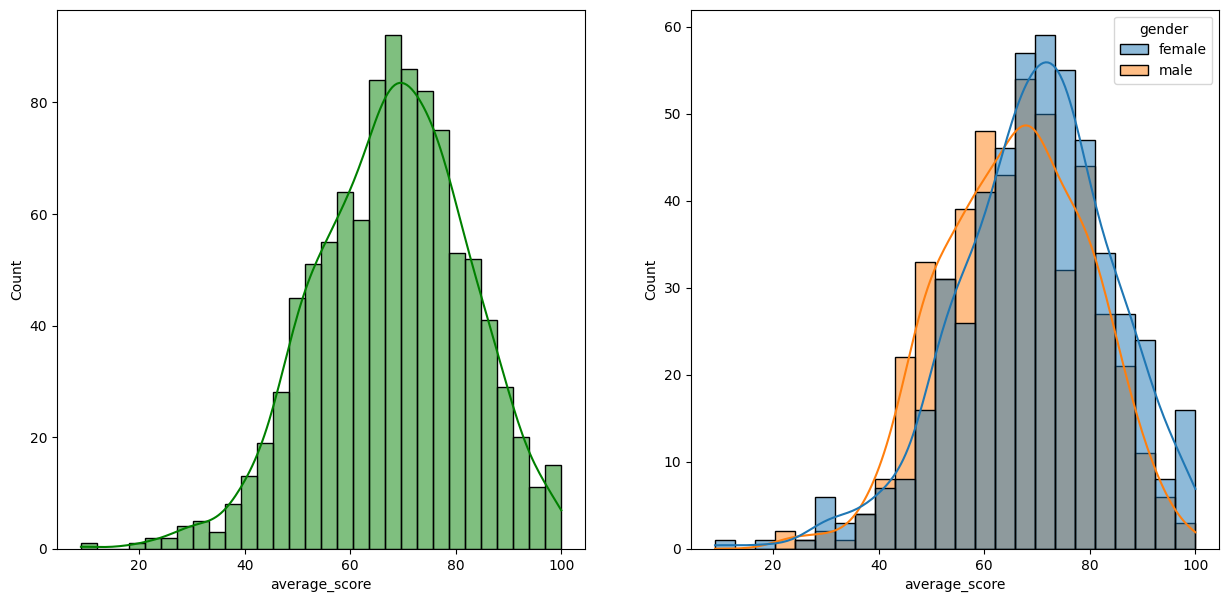

In [22]:
basic_histogram_vis(student_df, 'average_score', 'gender')

**Insight**

Female are more likely has higher score than Male

#### Visualize total score between gender

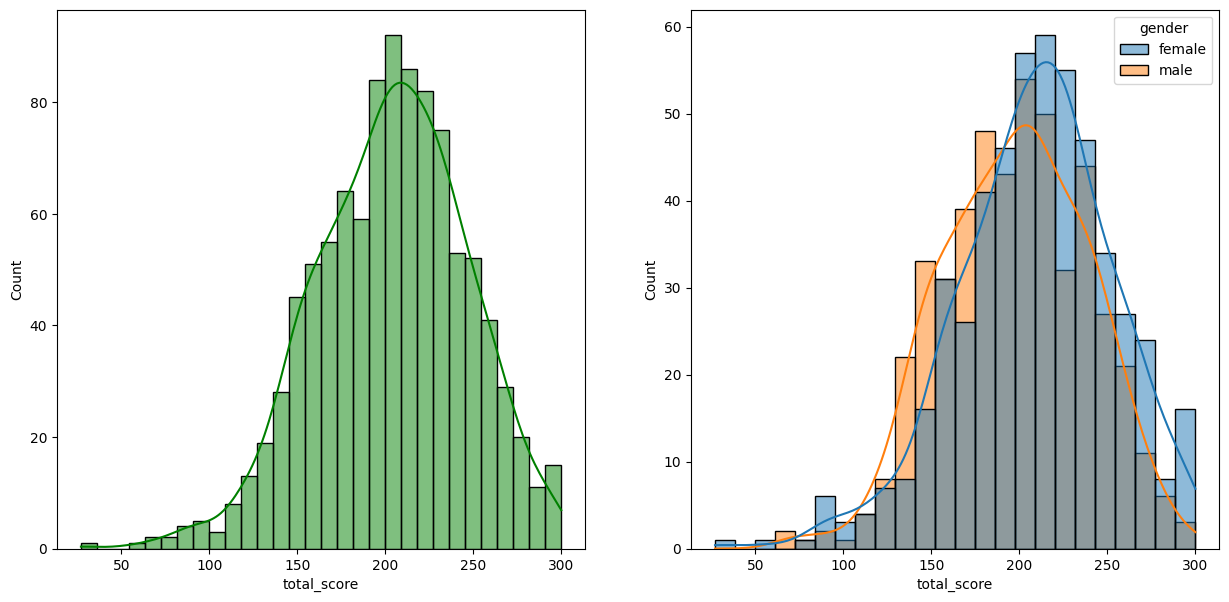

In [23]:
basic_histogram_vis(student_df, 'total_score', 'gender')

**Insight**

Also for the total score, Female has higher total score than Male

#### Visualize score between lunch type

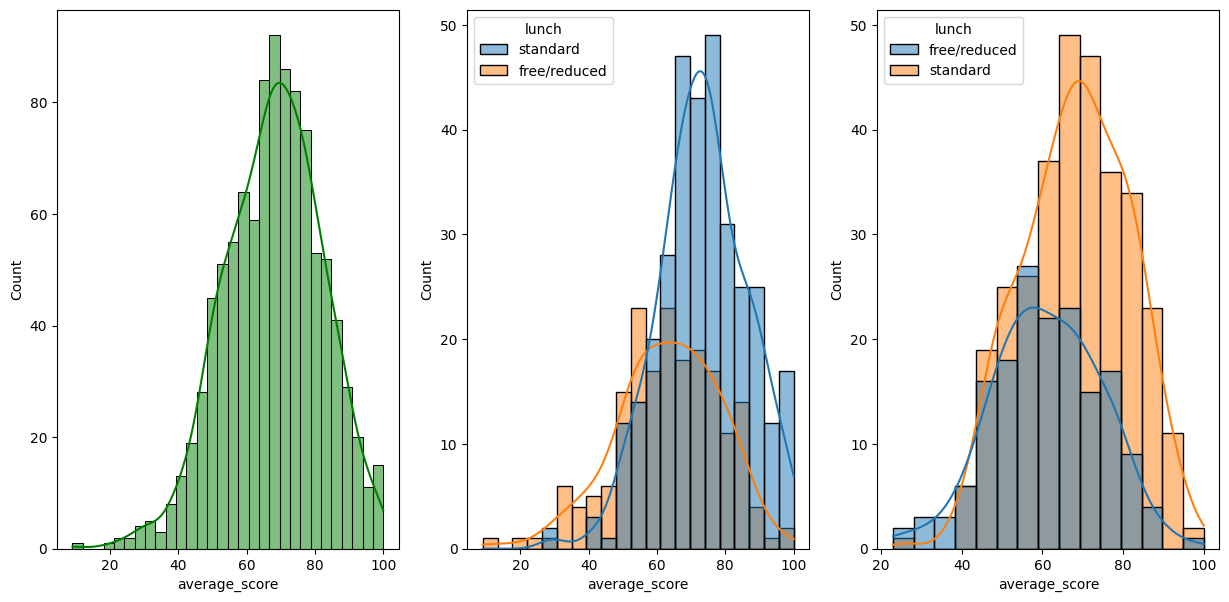

In [24]:
basic_histogram_3_vis(student_df, 'average_score', 'lunch')

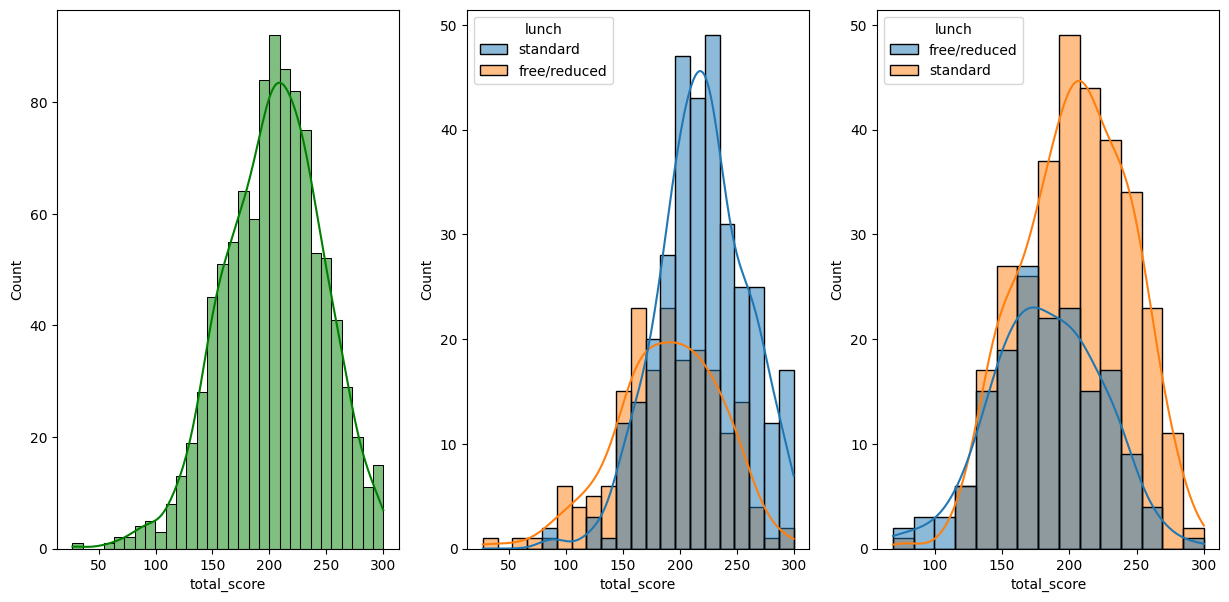

In [25]:
basic_histogram_3_vis(student_df, 'total_score', 'lunch')

**Insight**

Student that get **standard** lunch is tend to get higher average score and total score than student that get **reduced** lunch

from this visualization, type of lunch is make a huge difference 